<center>
    <h1>
    Influence du taux d’intérêt sur la valeur actuelle probable (VAP) d’une rente viagère
    </h1>
</center>
<hr>

### Téléchargement des données

In [1]:
install.packages("demography")
library("demography")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'demography':
  method      from 
  print.lca   e1071
  summary.lca e1071

This is demography 1.22 




In [2]:
options(repr.plot.width=10, repr.plot.height=10)

In [3]:
italyDemo<-hmd.mx(country="ITA",
                  username="salma.achour@esprit.tn",
                  password="nadia2020",
                  label="Italy")

Warning message in hmd.mx(country = "ITA", username = "salma.achour@esprit.tn", :
“NAs introduced by coercion”


In [4]:
italyDemo$year

[1] 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886
 [16] 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901
 [31] 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916
 [46] 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931
 [61] 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946
 [76] 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 [91] 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
[106] 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
[121] 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
[136] 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017

In [5]:
italyDemo

Mortality data for Italy
    Series: female male total
    Years: 1872 - 2017
    Ages:  0 - 110 

#### Long death rate/ Age

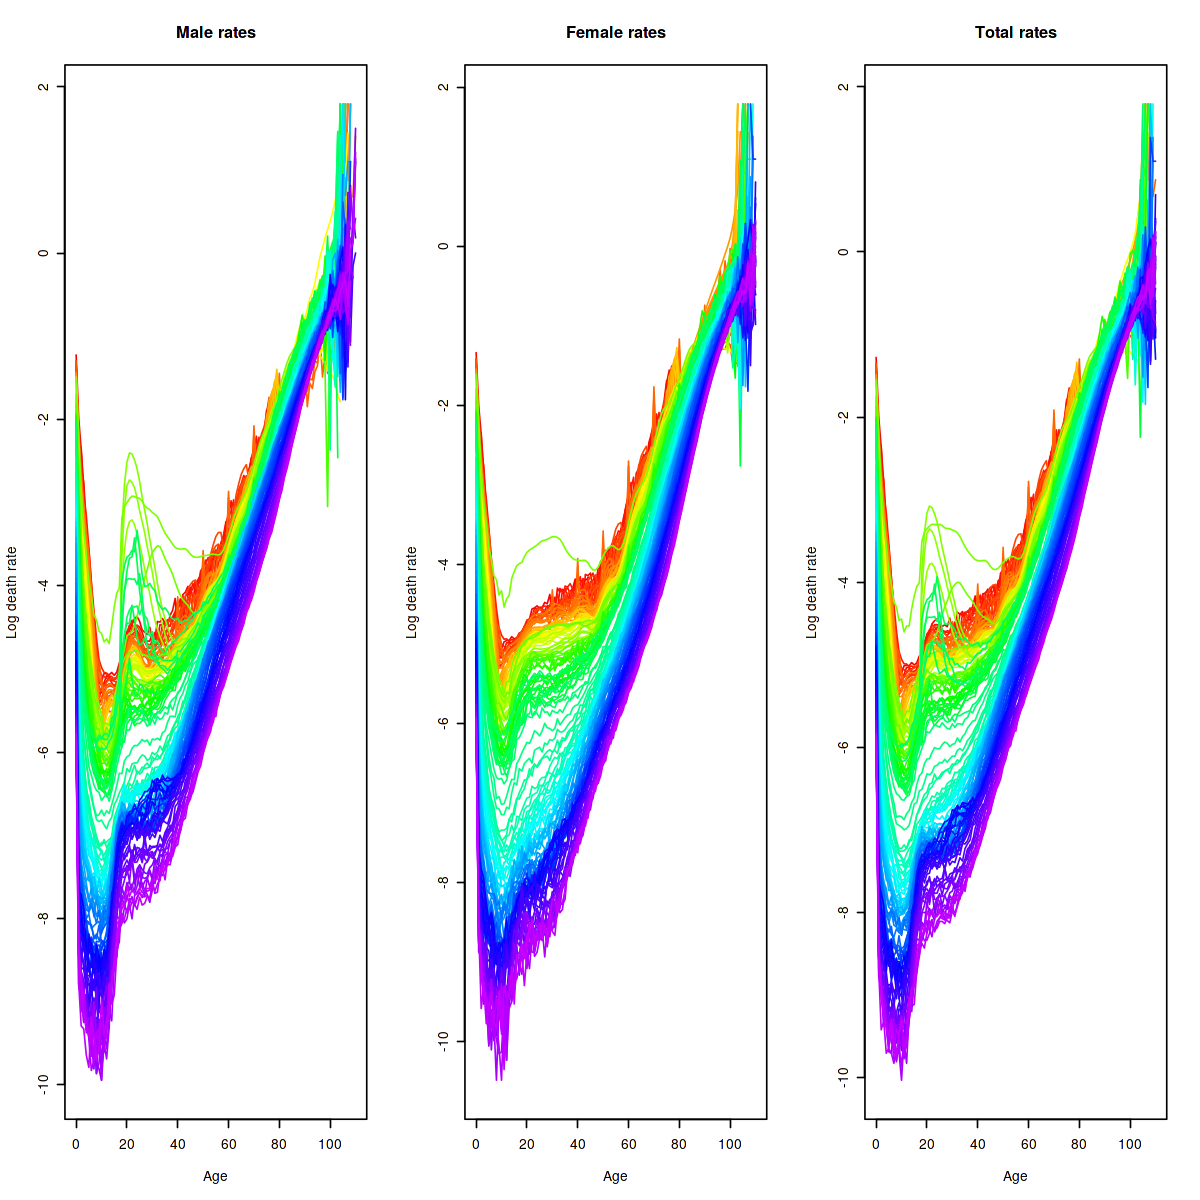

In [6]:
par(mfrow=c(1,3))
plot(italyDemo,series="male",datatype="rate", main="Male rates")
plot(italyDemo,series="female",datatype="rate", main="Female rates")
plot(italyDemo,series="total",datatype="rate", main="Total rates")

#### Long death rate/Years 


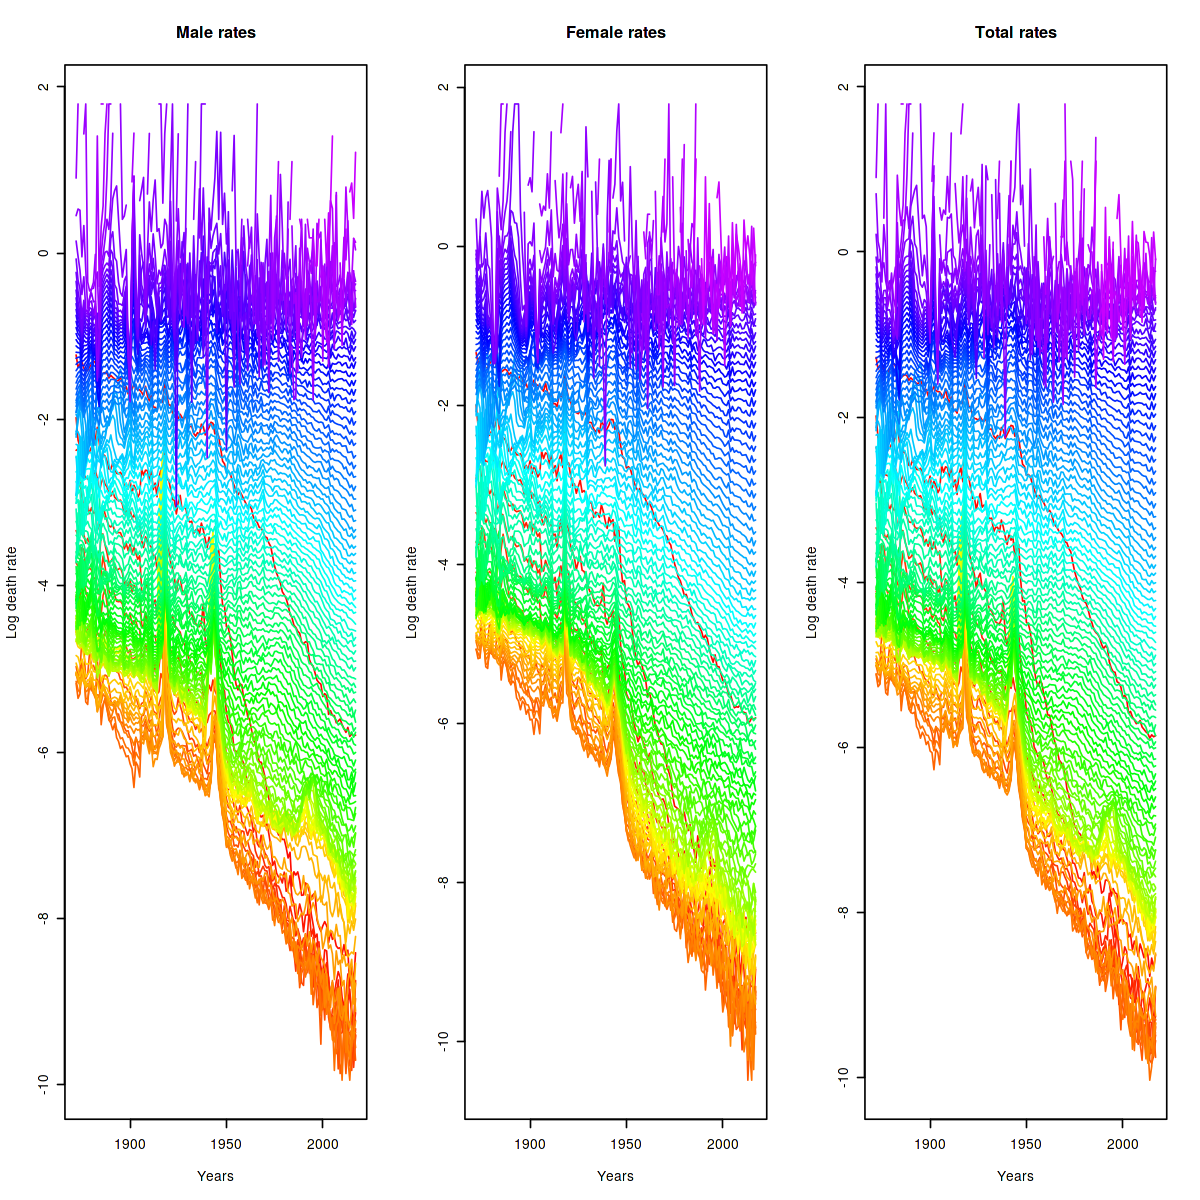

In [7]:
par(mfrow=c(1,3))
plot(italyDemo,series="male",datatype="rate",plot.type="time", main="Male rates",xlab="Years")
plot(italyDemo,series="female",datatype="rate",plot.type="time", main="Female rates",xlab="Years")
plot(italyDemo,series="total",datatype="rate",plot.type="time", main="Total rates",xlab="Years")

### Estimation des paramètres d’un modèle de Lee-Carter à partir des données historiques téléchargées

#### La Méthode Avec LCA Function:
LeeCarter est ici appliqué séparément entre la population masculine, féminine et totale et en considérant un âge maximum égal à 100.

In [8]:
italyLcaM<-lca(italyDemo,series="male",max.age=100,interpolate = TRUE)
italyLcaF<-lca(italyDemo,series="female",max.age=100,interpolate = TRUE)
italyLcaT<-lca(italyDemo,series="total",max.age=100,interpolate = TRUE)

`lca()` retourne un objet qui nous permet d'inspecter `ax`, `bx` et `kt`. Les chiffres représentent les valeurs des paramètres estimés dans la courbe.

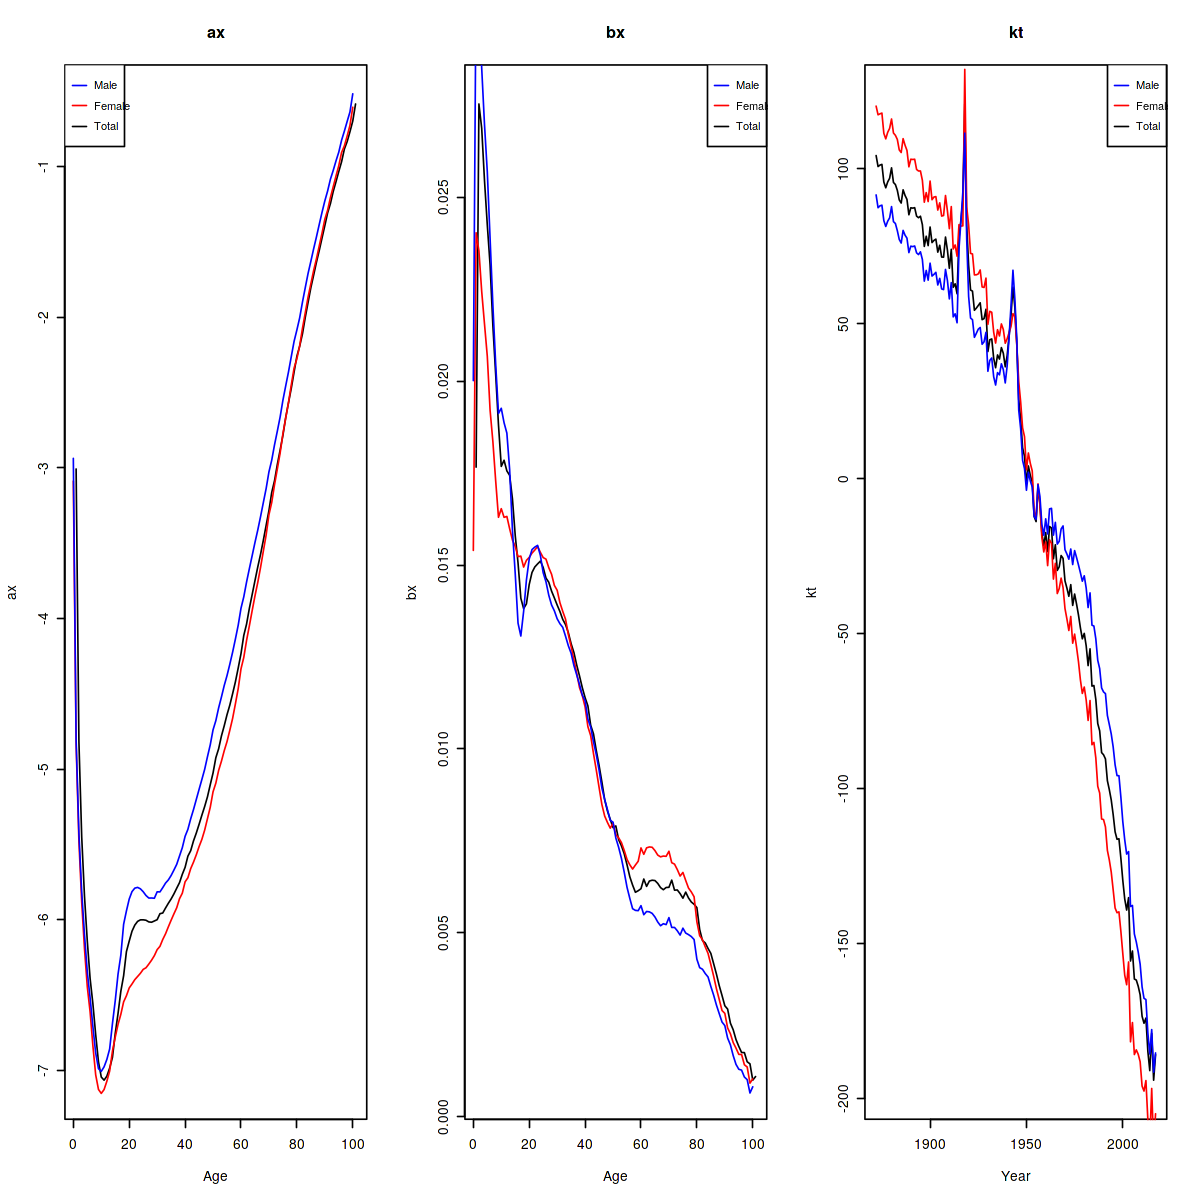

In [9]:
par(mfrow=c(1,3))
plot(italyLcaT$ax, main="ax", xlab="Age",ylab="ax",type="l")
lines(x=italyLcaF$age, y=italyLcaF$ax, main="ax", col="red")
lines(x=italyLcaM$age, y=italyLcaM$ax, main="ax", col="blue")

legend("topleft" , c("Male","Female","Total"),cex=0.8,col=c("blue","red","black"),lty=1);
plot(italyLcaT$bx, main="bx", xlab="Age",ylab="bx",type="l")
lines(x=italyLcaF$age, y=italyLcaF$bx, main="bx", col="red")
lines(x=italyLcaM$age, y=italyLcaM$bx, main="bx", col="blue")
legend("topright" , c("Male","Female","Total"),cex=0.8,col=c("blue","red","black"),lty=1);
plot(italyLcaT$kt, main="kt", xlab="Year",ylab="kt",type="l")
lines(x=italyLcaF$year, y=italyLcaF$kt, main="kt", col="red")
lines(x=italyLcaM$year, y=italyLcaM$kt, main="kt", col="blue")
legend("topright" , c("Male","Female","Total"),cex=0.8,col=c("blue","red","black"),lty=1);

Pour mieux visualiser la courbe de kt et prendre des décisions précises après dans l'estimation des coefficients du modèle:

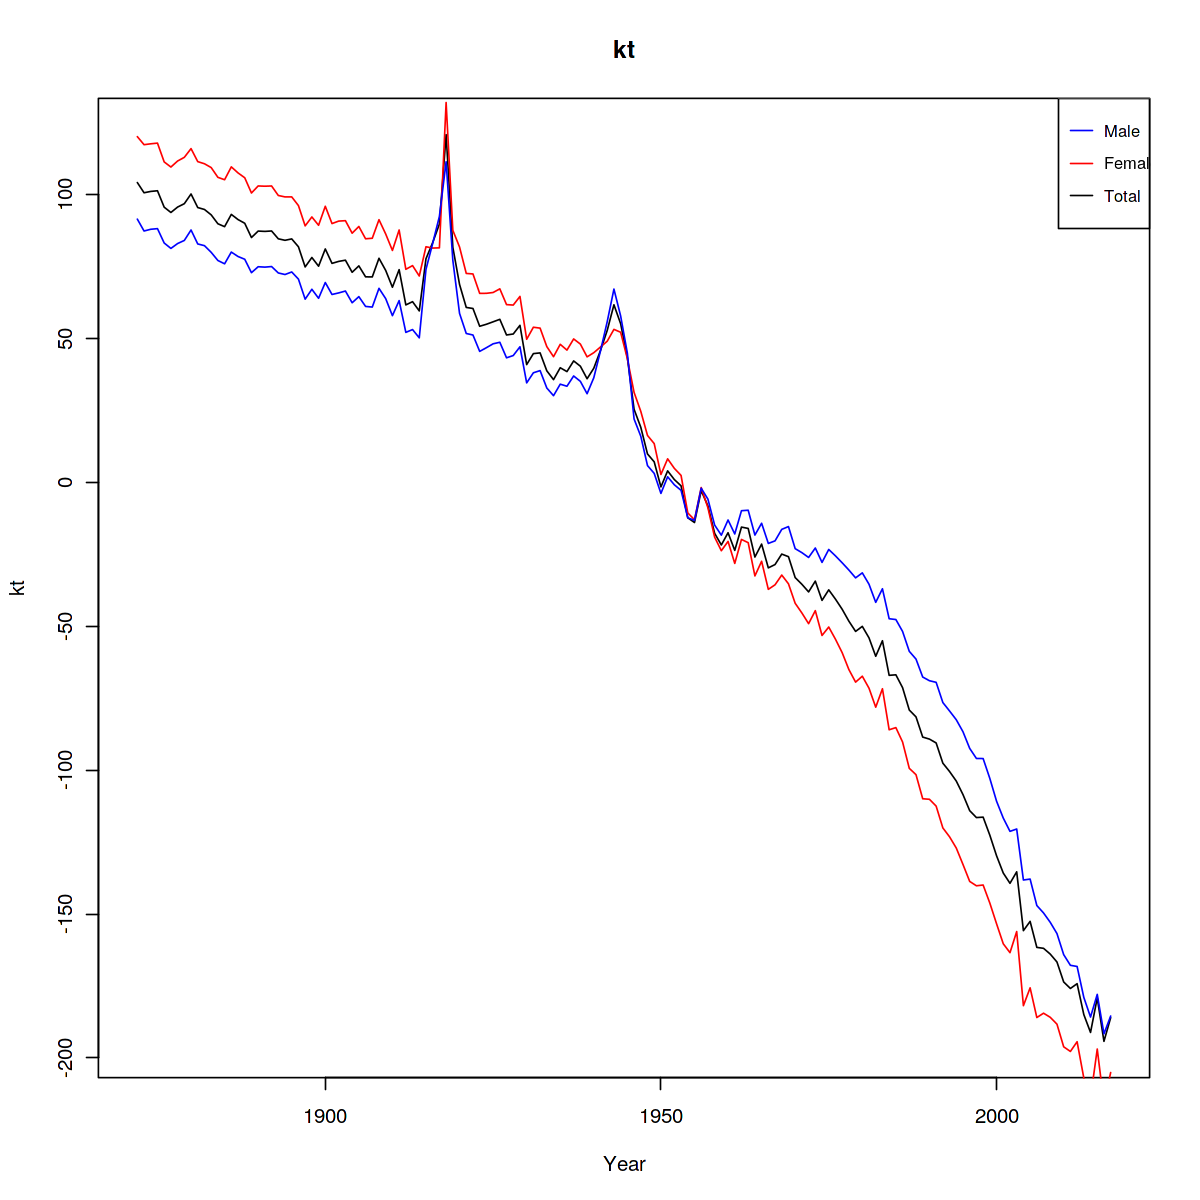

In [10]:
plot(italyLcaT$kt, main="kt", xlab="Year",ylab="kt",type="l")
lines(x=italyLcaF$year, y=italyLcaF$kt, main="kt", col="red")
lines(x=italyLcaM$year, y=italyLcaM$kt, main="kt", col="blue")
legend("topright" , c("Male","Female","Total"),cex=0.8,col=c("blue","red","black"),lty=1);

#### Interprétation:
- Un comportement similaire des paramètres est observé selon différents ensembles de données.
- Comme prévu la mortalité moyenne augmente lorsque l'âge augmente (voir schéma ax). En outre, il est clairement visible la jeune bosse de mortalité pour les hommes dans la tranche d'âge (20,30) en raison de décès accidentels.
- bx montre plutôt une valeur plus élevée pour les jeunes âges et une plus grande amélioration pour les la tranche d'âge (60-80). 
- Comme prévu, kt a une tendance à la baisse avec l'augmentation de temps.

#### La Méthode Avec "StMoMo" package

In [11]:
library("StMoMo")

Loading required package: gnm



__Chargement des données:__

Utiliser le nombre total de décès, expositions en milieu d'année

In [12]:
ita.StMoMoData<-StMoMoData(data=italyDemo, series = "total",type="central")

__Porter les données à l'année initiale:__

Avec `central2initial`, on transforme les données `StMoMo` des expositions centrales en expositions initiales. Les expositions initiales sont calculées en ajoutant la moitié des décès aux expositions centrales.

In [13]:
ita.StMoMoData.Ini<-central2initial(ita.StMoMoData)
ita.StMoMoData.Ini

Mortality data for Italy
    Series:  total
    Years: 1872 - 2017
    Ages:  0 - 110
    Exposure:  initial 

__Assurer un âge maximum 100 ans:__

In [14]:
ages.fit = 0:100

`genWeightMat()`: Génère une matrice de poids en fonction d'un groupe d'âge et d'années et d'un ensemble de cohortes étant donné un poids nul. Ceci est utile pour exclure certains points de données lors de l'ajustement d'une mortalité stochastique Modèle.

`clip`: Nombre de cohortes dans la limite pour attribuer un poids nul. Cela peut être utilisé pour peser zéro certaines des premières et dernières cohortes dans les données.

In [15]:
wxt <- genWeightMat(ages = ages.fit, years = ita.StMoMoData.Ini$years,clip = 3)

__Ajustemeent du modèle avec les données initilisées__

In [16]:
LC <- lc(link = "log")
LCfit <- fit(LC, data = ita.StMoMoData.Ini, ages.fit = ages.fit, wxt = wxt)
LCfit

Warning message in fit.StMoMo(LC, data = ita.StMoMoData.Ini, ages.fit = ages.fit, :
“log-Poisson model fitted to initial exposure data
”


StMoMo: The following cohorts have been zero weigthed: 1772 1773 1774 2015 2016 2017 
StMoMo: Start fitting with gnm
Initialising
Running start-up iterations..
Running main iterations............................
Done
StMoMo: Finish fitting with gnm


Stochastic Mortality Model fit
Call: fit.StMoMo(object = LC, data = ita.StMoMoData.Ini, ages.fit = ages.fit,  
Call:     wxt = wxt)

Poisson model with predictor: log m[x,t] = a[x] + b1[x] k1[t]

Data:  Italy
Series:  total
Years in fit: 1872 - 2017
Ages in fit: 0 - 100 

Log-likelihood:  -1210469.04
Deviance:  2277399.67
Number of parameters:  346

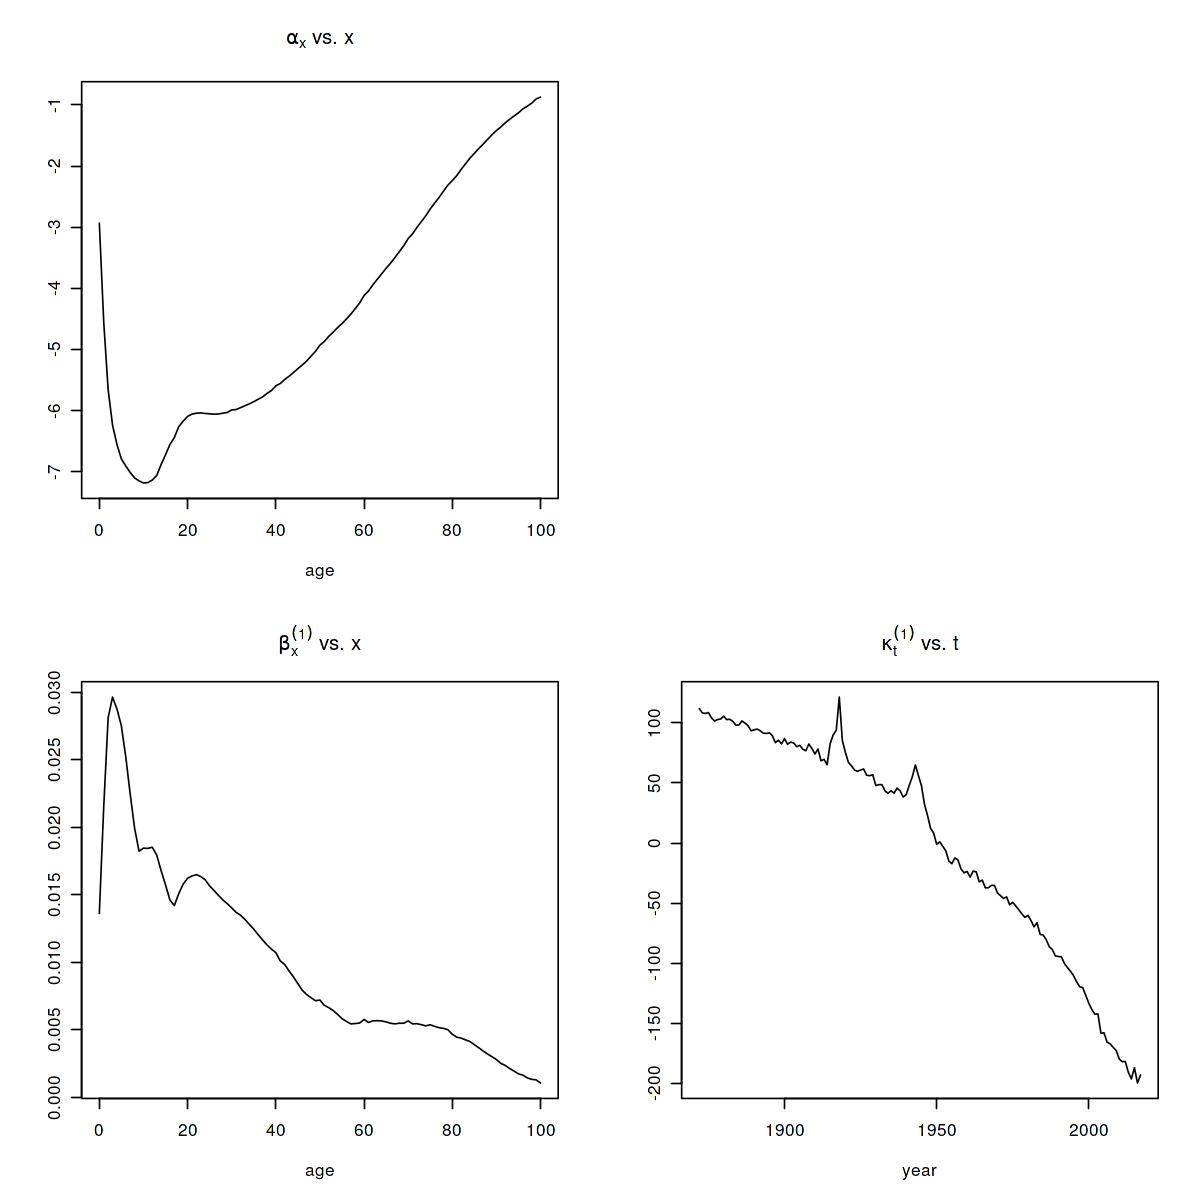

In [17]:
plot(LCfit)

#### Interprétation:
- Les paramètres ax représentent la tendance liée à l’effet isolé de l’âge sur les taux de mortalité. Exactement comme pour le données empiriques, on obtient une fonction unimodale décroissante pour les âges faibles inférieur à 10 ans puis une forte croissante jusqu’à la fin de la vie.

- Les paramètres bx représentent l’interaction de l’effet des années calendaires sur les taux de mortalité. Cet effet est toujours positif mais la valeur ne cesse de diminuer avec l’âge. Autrement dit, l’effet des années calendaires agit majoritairement avant 60 ans et de moins en moins au delà. On constate une bosse à 22 ans. Pour des âges élevés, l’effet est quasi-inexistant puisque bx à peu prés est égale à zéro.

- Enfin, comme prévu, kt a une tendance à la baisse avec l'aide de temps

### Projeter et simuler des modèles de mortalité

In [18]:
library('forecast')

En utilisant LCA, on peut donc utiliser le package Forecast pour projeter les futurs kts (jusqu'à 110). La projection est basé sur l'extrapolation ARIMA.

In [19]:
fT<-forecast(italyLcaT,h=50)

__Projection des ajustements individuels pour les 50 prochaines années__

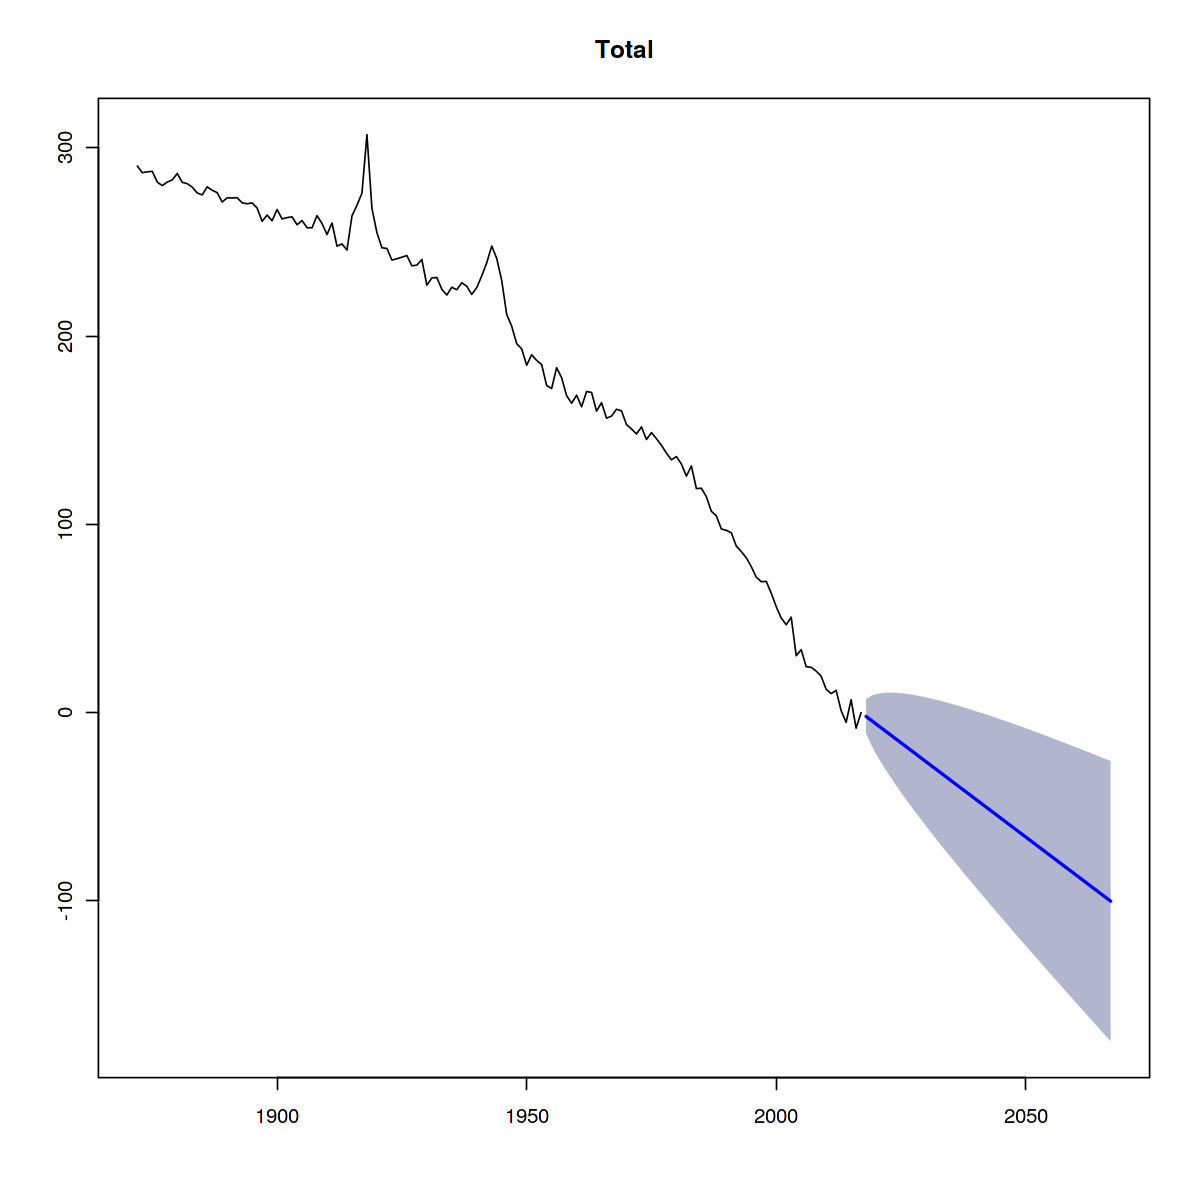

In [20]:
plot(fT$kt.f,main="Total")

### Afficher les log taux de mortalité historiques et projetés pour la cohorte concernée

`extractCohort()` : Extraire des cohortes à partir d'un tableau âge-période. Ceci est utile pour construire une table de mortalité ou pour effectuer des calculs actuariels / démographiques sur une base de cohorte en utilisant la sortie de plusieurs fonctions dans StMoMo 

_Une cohorte_ désigne un ensemble d'individus ayant vécu un même événement au cours d'une même période :

__cohort = 1943 => 2018-75 = period-age__

In [21]:
install.packages("lifecontingencies")
library("lifecontingencies")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matlab’, ‘markovchain’


Package:  lifecontingencies
Authors:  Giorgio Alfredo Spedicato [aut, cre]
    (<https://orcid.org/0000-0002-0315-8888>),
  Christophe Dutang [ctb] (<https://orcid.org/0000-0001-6732-1501>),
  Reinhold Kainhofer [ctb] (<https://orcid.org/0000-0002-7895-1311>),
  Kevin J Owens [ctb],
  Ernesto Schirmacher [ctb],
  Gian Paolo Clemente [ctb] (<https://orcid.org/0000-0001-6795-4595>),
  Ivan Williams [ctb]
Version:  1.3.6
Date:     2019-03-05 23:50:03 UTC
BugReport: http://github.com/spedygiorgio/lifecontingencies/issues




__Projeter les taux de mortalité à l’aide de la fonction forecast. On prendra soin de bien justifier le choix du nombre d’années pour la projection du modèle.__

In [22]:
horizon=50
LCfor <- forecast(LCfit, h = horizon)

In [23]:
LCfor

Stochastic Mortality Model forecast
Call: forecast.fitStMoMo(object = LCfit, h = horizon)

Poisson model with predictor: log m[x,t] = a[x] + b1[x] k1[t]

kt model: mrwd
Jump-off method: fit
Data:  Italy
Series:  total
Years in forecast: 2018 - 2067
Ages in forecast: 0 - 100 

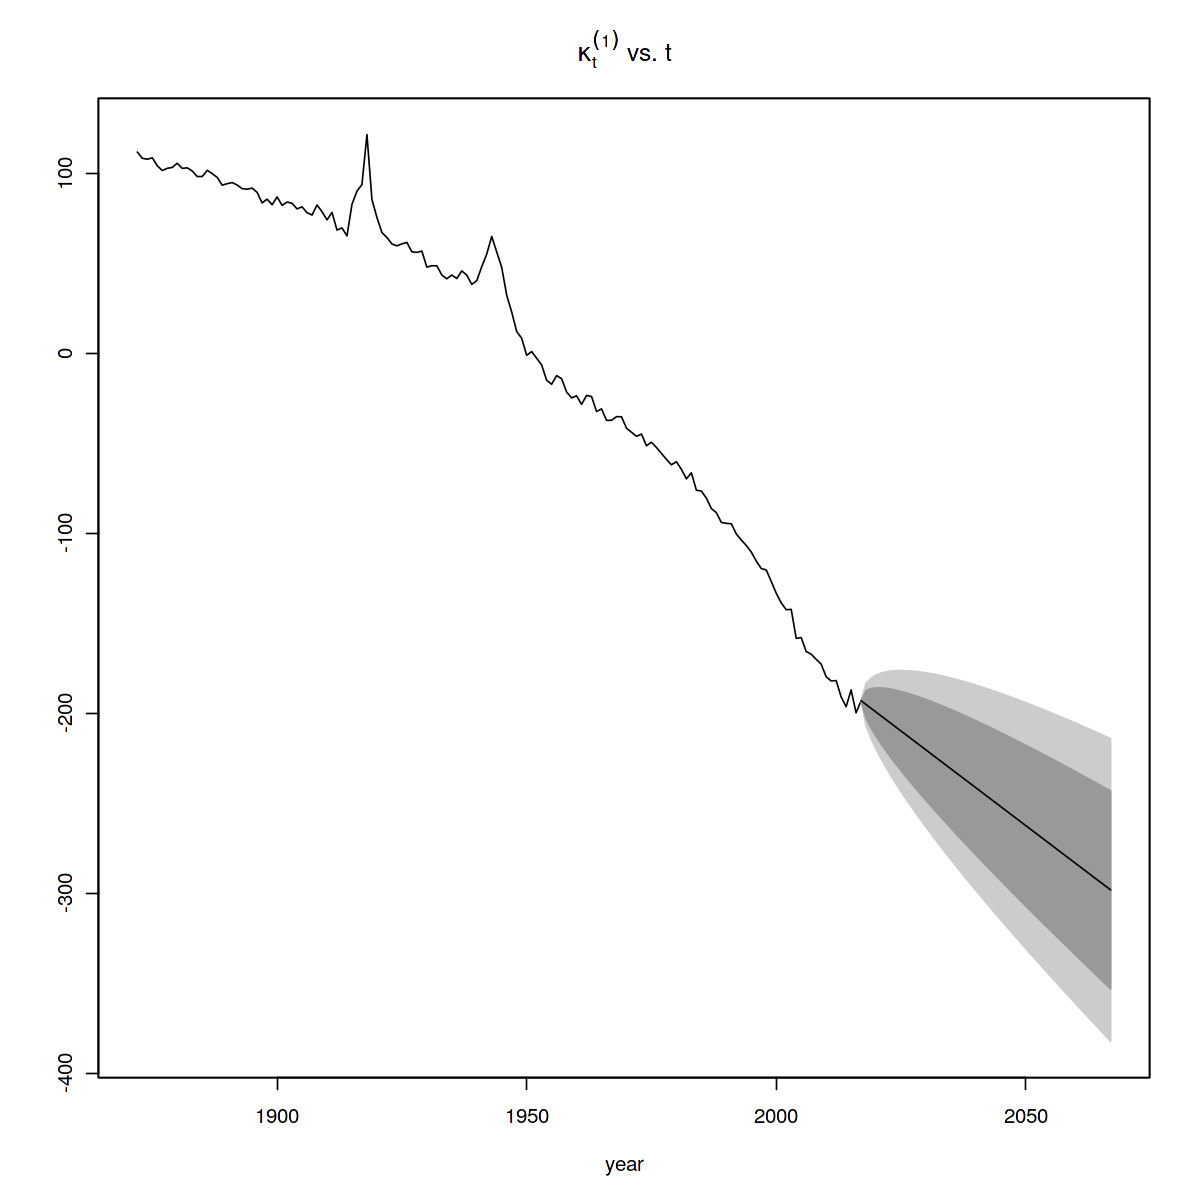

In [24]:
plot(LCfor,only.kt=TRUE)

In [25]:
lc_historical_rates1 <- extractCohort(fitted(LCfit, type = "rates"),cohort=1943)
lc_forecasted_rates1 <- extractCohort(LCfor$rates, cohort = 1943)
lc_rates_2018 <- c(lc_historical_rates1,lc_forecasted_rates1)

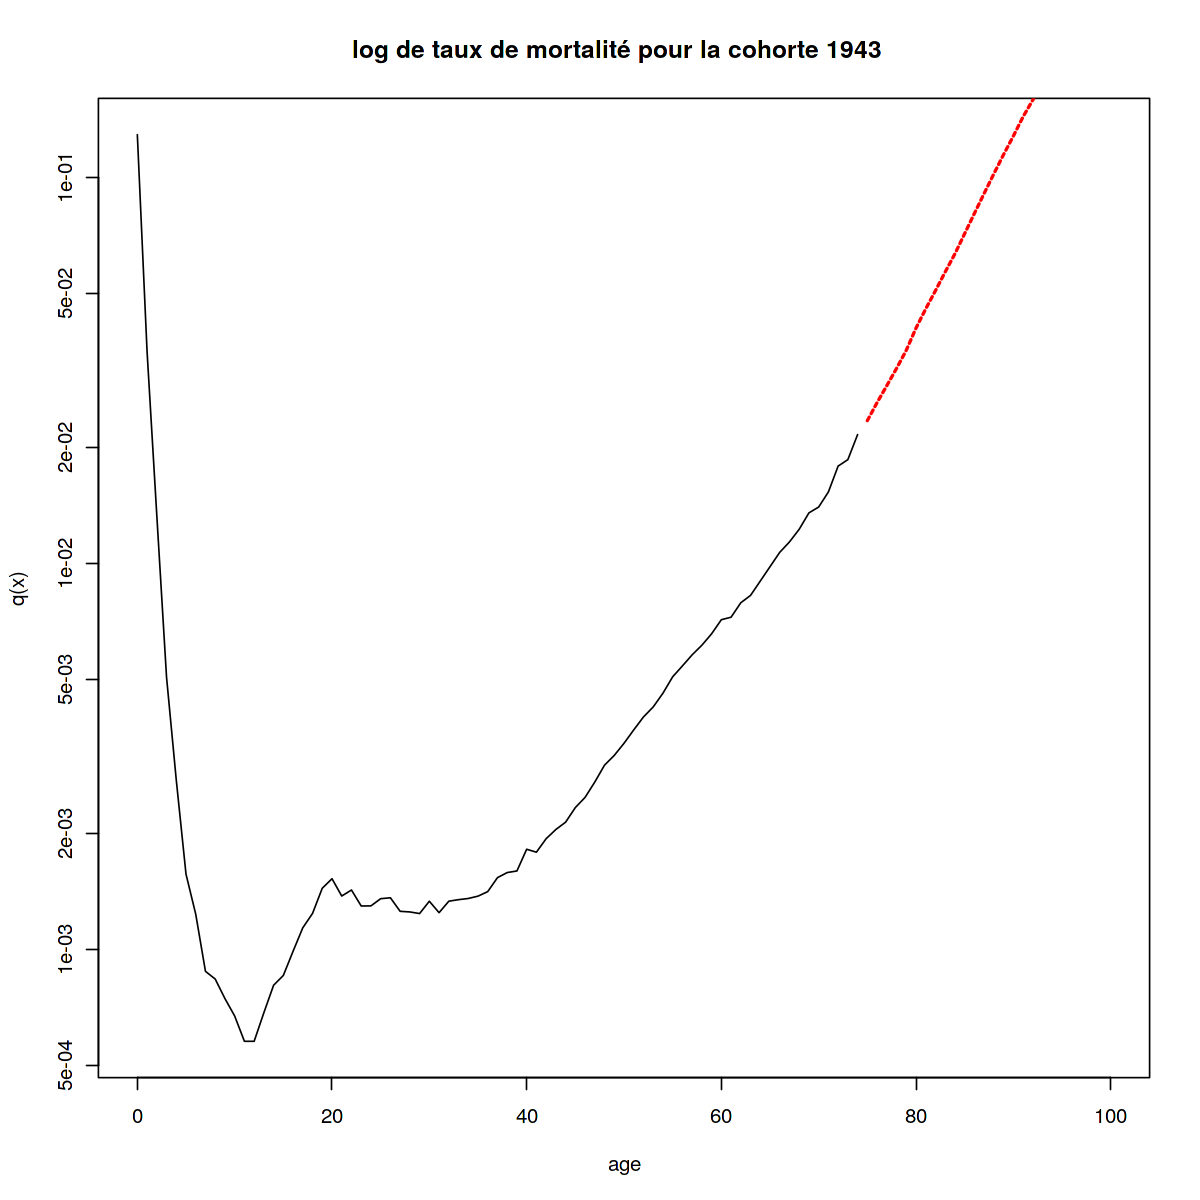

In [26]:
plot(0:74,lc_historical_rates1 , type = "l", xlim = c(0,100), xlab = "age", ylab = "q(x)",
main = "log de taux de mortalité pour la cohorte 1943  " ,log = "y")
lines(75:100,lc_forecasted_rates1,col = "red", lty = 2, lwd = 2 )

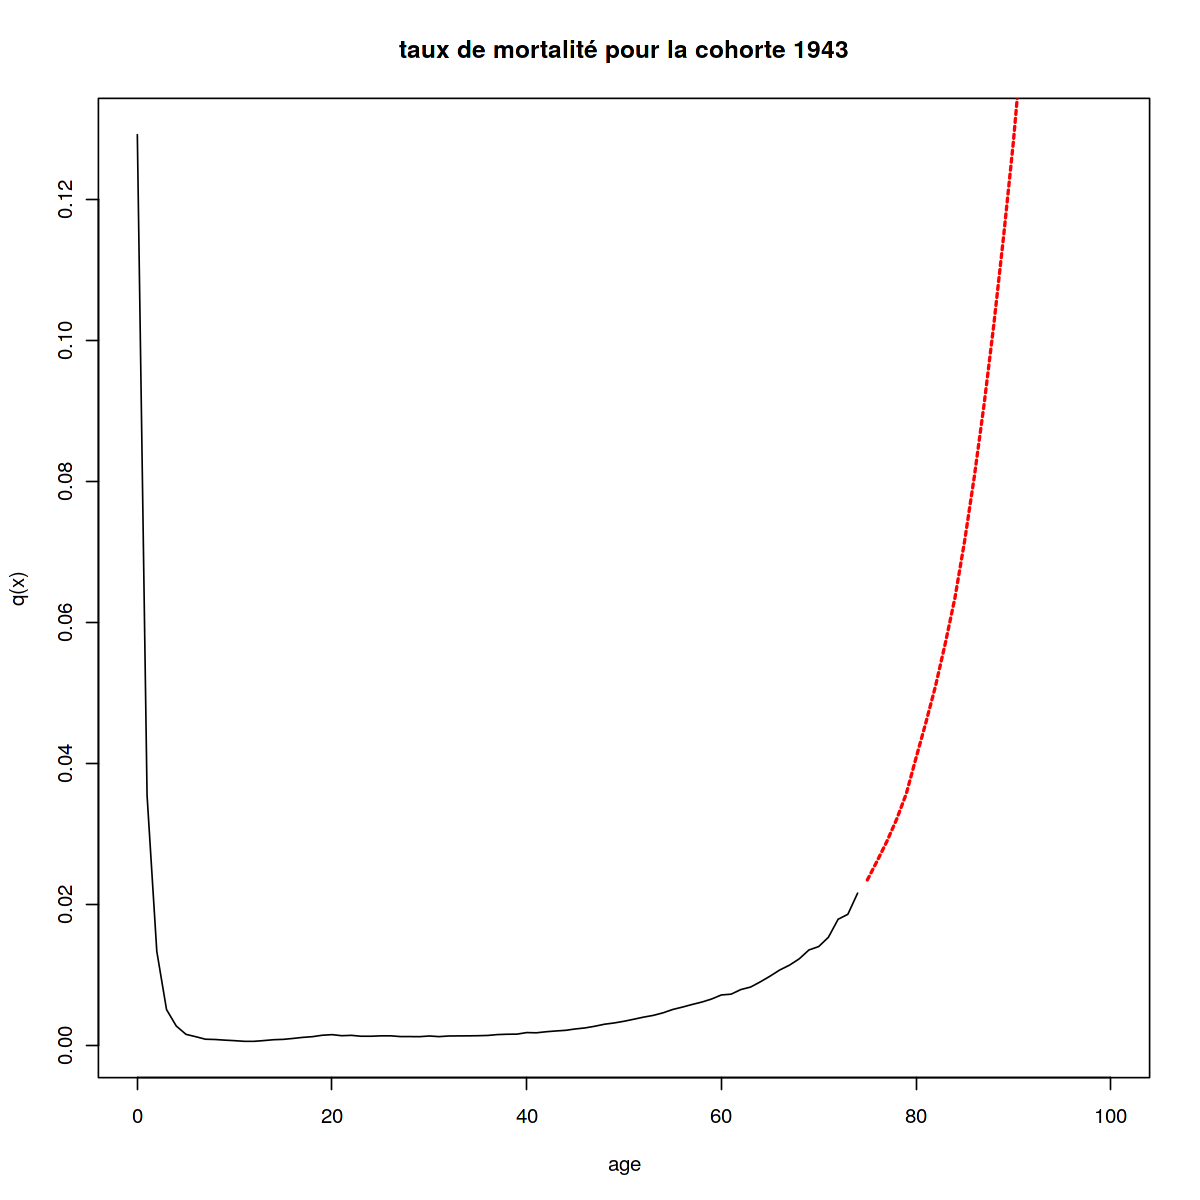

In [27]:
plot(0:74,lc_historical_rates1 , type = "l", xlim = c(0,100), xlab = "age", ylab = "q(x)",
 main = "taux de mortalité pour la cohorte 1943" )
lines(75:100,lc_forecasted_rates1,col = "red", lty = 2, lwd = 2 )

In [28]:
head(lc_rates_2018,30)

0            1            2            3            4            5 
0.1291459809 0.0354338319 0.0133285426 0.0050813777 0.0027518204 0.0015692516 
           6            7            8            9           10           11 
0.0012356368 0.0008788400 0.0008394951 0.0007471381 0.0006733836 0.0005792342 
          12           13           14           15           16           17 
0.0005789891 0.0006867228 0.0008091159 0.0008576219 0.0009907417 0.0011397804 
          18           19           20           21           22           23 
0.0012415783 0.0014428606 0.0015270368 0.0013774300 0.0014275771 0.0012978888 
          24           25           26           27           28           29 
0.0012986711 0.0013556058 0.0013629808 0.0012573160 0.0012526105 0.0012406158

### Calculer la VAP du contrat (à la date de souscription du contrat)

`mx2qx` (Taux De Mortalité Par Rapport Aux Probabilités De Décès.): Cette Fonction permet de  convertir les taux de mortalité en probabilités de décès.

`probs2lifetable` (Table De Mortalité à Partir Des Probabilités): Cette fonction renvoie un objet de table de vie nouvellement créé en fonction des probabilités de survie ou de décès

`exn` (Expected Residual Life): Durée de vie résiduelle attendue .Cette méthode calcule la durée de vie attendue entre les âges x et x + n.

`axn` (Annuity Immediate And Due Function): Cette fonction calcule la valeur actuarielle des rentes, à partir d'un tableau actuariel.

__Convertir le taux de mortalité en probabilité de décés pour la cohorte 1943 en utilisant celle calculé par Lee Carter__

In [29]:
lc_qx_2018<-mx2qx(lc_rates_2018)
head(lc_qx_2018 ,30)

0            1            2            3            4            5 
0.1213124718 0.0348169823 0.0132403056 0.0050685003 0.0027480393 0.0015680213 
           6            7            8            9           10           11 
0.0012348739 0.0008784540 0.0008391429 0.0007468591 0.0006731569 0.0005790665 
          12           13           14           15           16           17 
0.0005788216 0.0006864870 0.0008087887 0.0008572543 0.0009902512 0.0011391312 
          18           19           20           21           22           23 
0.0012408080 0.0014418204 0.0015258717 0.0013764820 0.0014265588 0.0012970470 
          24           25           26           27           28           29 
0.0012978284 0.0013546876 0.0013620525 0.0012565260 0.0012518265 0.0012398467

__Création d'une nouvelle table de survie en utilisant la probabilité de décés__

In [30]:
lc_lifetable_2018<-probs2lifetable(probs=lc_qx_2018,
                                   type = "qx",
                                   name = paste("LC","2018","lt",sep="_"))

__La table de survie__

In [31]:
print(lc_lifetable_2018)

Life table LC_2018_lt 

      x         lx        px         ex
1     0 10000.0000 0.8786875 66.3968561
2     1  8786.8753 0.9651830 74.5636719
3     2  8480.9428 0.9867597 76.2534023
4     3  8368.6525 0.9949315 76.2765677
5     4  8326.2360 0.9972520 75.6651450
6     5  8303.3552 0.9984320 74.8736487
7     6  8290.3353 0.9987651 73.9912366
8     7  8280.0978 0.9991215 73.0827194
9     8  8272.8241 0.9991609 72.1469757
10    9  8265.8821 0.9992531 71.2075681
11   10  8259.7086 0.9993268 70.2607899
12   11  8254.1485 0.9994209 69.3081183
13   12  8249.3688 0.9994212 68.3482756
14   13  8244.5939 0.9993135 67.3878599
15   14  8238.9341 0.9991912 66.4341526
16   15  8232.2706 0.9991427 65.4879273
17   16  8225.2134 0.9990097 64.5441153
18   17  8217.0684 0.9988609 63.6080935
19   18  8207.7081 0.9987592 62.6806341
20   19  8197.5239 0.9985582 61.7585053
21   20  8185.7045 0.9984741 60.8476786
22   21  8173.2142 0.9986235 59.9406662
23   22  8161.9639 0.9985734 59.0232872
24   23  8150.32

__Création d"une nouvelle table actuarielle avec taux d'interet de 1.5%__

In [32]:
lc_acttbl_2018<-new("actuarialtable",
                    x=lc_lifetable_2018@x,
                    lx=lc_lifetable_2018@lx,
                    interest=0.015,
                    name="LC")

__La table actuarielle__

In [33]:
print(lc_acttbl_2018)

Actuarial table  LC interest rate  1.5 % 

      x         lx          Dx           Nx          Cx         Mx           Rx
1     0 10000.0000 10000.00000 389193.78319 1195.196766 4248.36774 197302.35086
2     1  8786.8753  8657.01998 379193.78319  296.956958 3053.17097 193053.98312
3     2  8480.9428  8232.12677 370536.76321  107.385098 2756.21401 190000.81215
4     3  8368.6525  8003.08463 362304.63644   39.964174 2648.82891 187244.59814
5     4  8326.2360  7844.84827 354301.55182   21.239361 2608.86474 184595.76922
6     5  8303.3552  7707.67519 346456.70355   11.907191 2587.62538 181986.90448
7     6  8290.3353  7581.86147 338749.02837    9.224279 2575.71819 179399.27910
8     7  8280.0978  7460.58997 331167.16690    6.456931 2566.49391 176823.56091
9     8  8272.8241  7343.87802 323706.57693    6.071491 2560.03698 174257.06700
10    9  8265.8821  7229.27631 316362.69891    5.319459 2553.96549 171697.03002
11   10  8259.7086  7117.12026 309133.42260    4.720137 2548.64603 169143.064

* #### Pour le cas d'une rente viagère à termes anticipés

__Calculer la valeur Actuelle Probable d’une rente viagère à termes anticipés pour l'age 75 à partir d'un tableau actuariel de l'année 1943__

In [34]:
axn(actuarialtable = lc_acttbl_2018,x=75)

[1] 12.35293

* #### Pour le cas d’une rentre viagère temporaire d’une durée de 15 ans

__Calculer la valeur Actuelle Probable  d’une rentre viagère temporaire d’une durée de 15 ans. pour l'age 75 à partir d'un tableau actuariel de l'année 1943__

In [35]:
axn(actuarialtable = lc_acttbl_2018,x=75,m=15)

[1] 1.776947

### Étudier la variation de la VAP en fonction du taux d’intérêt.

In [36]:
list <- c()
j=1
for (i in seq(0.005,0.06,by=0.005)){
lc_acttbl_2018<-new("actuarialtable",x=lc_lifetable_2018@x,lx=lc_lifetable_2018@lx, interest=i,name="LC")
x=axn(actuarialtable = lc_acttbl_2018,x=75)
list[j] <- x
j <- j+1
cat("Pour le taux d'interet ",i,"  VAP = :",axn(actuarialtable = lc_acttbl_2018,x=75),"\n")
}

Pour le taux d'interet  0.005   VAP = : 13.34256 
Pour le taux d'interet  0.01   VAP = : 12.83141 
Pour le taux d'interet  0.015   VAP = : 12.35293 
Pour le taux d'interet  0.02   VAP = : 11.90451 
Pour le taux d'interet  0.025   VAP = : 11.4838 
Pour le taux d'interet  0.03   VAP = : 11.08864 
Pour le taux d'interet  0.035   VAP = : 10.71709 
Pour le taux d'interet  0.04   VAP = : 10.36737 
Pour le taux d'interet  0.045   VAP = : 10.03786 
Pour le taux d'interet  0.05   VAP = : 9.727059 
Pour le taux d'interet  0.055   VAP = : 9.433625 
Pour le taux d'interet  0.06   VAP = : 9.156314 


In [37]:
list

[1] 13.342558 12.831413 12.352929 11.904509 11.483795 11.088641 10.717094
 [8] 10.367374 10.037857  9.727059  9.433625  9.156314

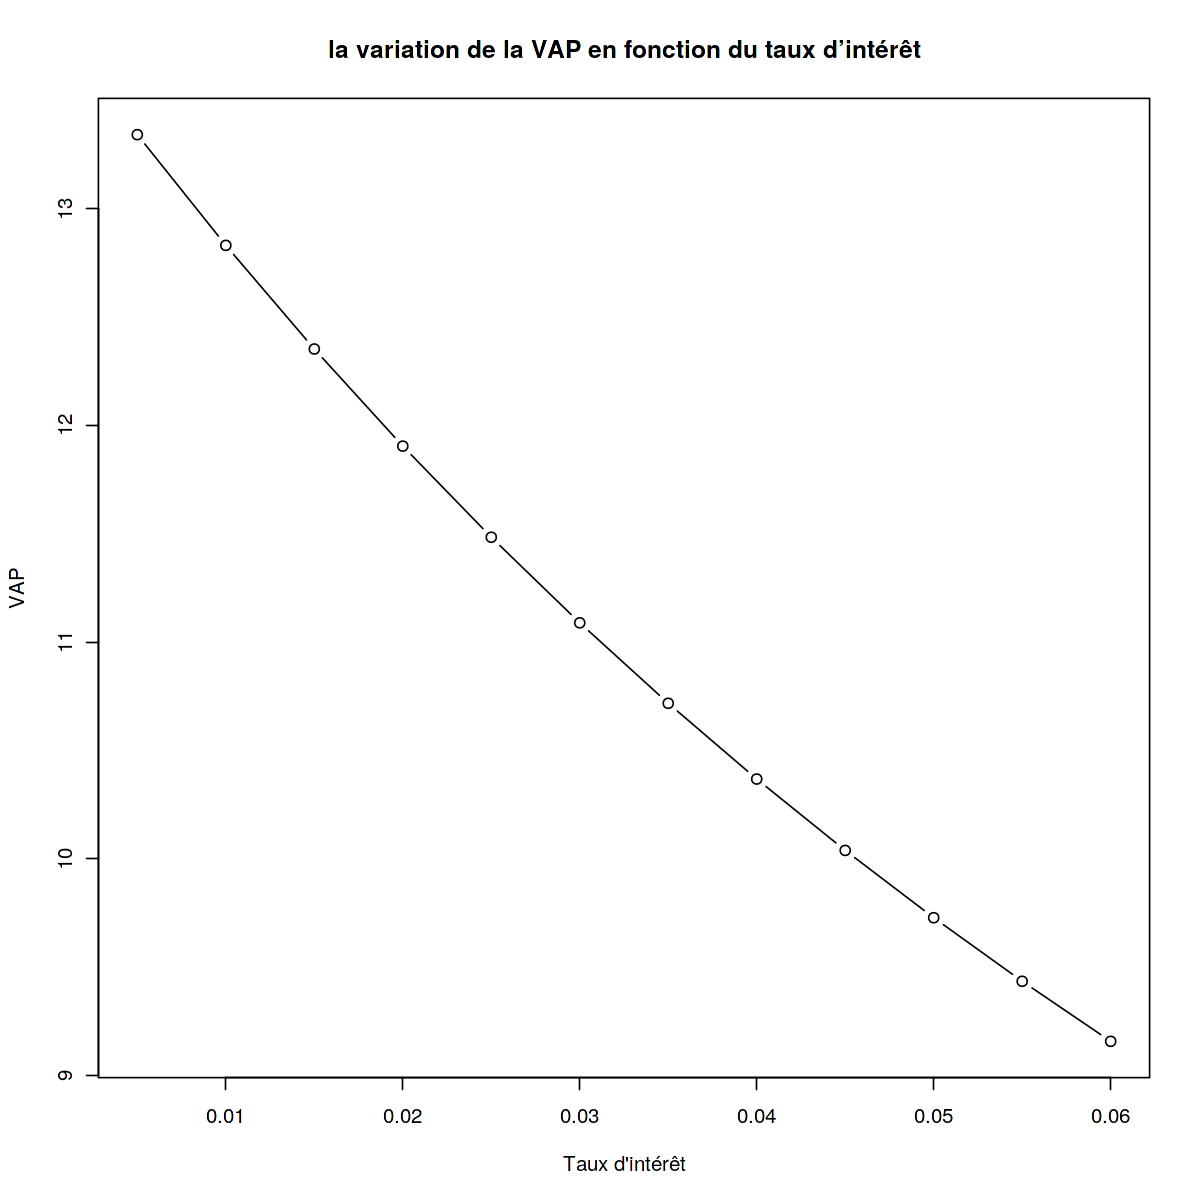

In [38]:
plot(seq(0.005,0.06,by=0.005),list,type="b",xlab="Taux d'intérêt",ylab="VAP", main = "la variation de la VAP en fonction du taux d’intérêt")

### Comparer l’influence du taux d’intérêt à l’influence de la variation des taux de mortalité

In [39]:
list <- c()
j=1
for (i in seq(0.005,0.06,by=0.005)){
lc_acttbl_2018<-new("actuarialtable",x=lc_lifetable_2018@x,lx=lc_lifetable_2018@lx, interest=i,name="LC")
lc_acttbl_20181 <- as(lc_acttbl_2018,"data.frame")
x = lc_acttbl_20181[75 , 'Mx']
list[j] <- log(x)
j <- j+1
cat("Pour le taux d'interet ",i,"  Mx = :",log(x),"\n")
  }

Pour le taux d'interet  0.005   Mx = : 8.305667 
Pour le taux d'interet  0.01   Mx = : 7.86786 
Pour le taux d'interet  0.015   Mx = : 7.433442 
Pour le taux d'interet  0.02   Mx = : 7.002368 
Pour le taux d'interet  0.025   Mx = : 6.574598 
Pour le taux d'interet  0.03   Mx = : 6.150089 
Pour le taux d'interet  0.035   Mx = : 5.728796 
Pour le taux d'interet  0.04   Mx = : 5.310677 
Pour le taux d'interet  0.045   Mx = : 4.895687 
Pour le taux d'interet  0.05   Mx = : 4.483784 
Pour le taux d'interet  0.055   Mx = : 4.074921 
Pour le taux d'interet  0.06   Mx = : 3.669056 


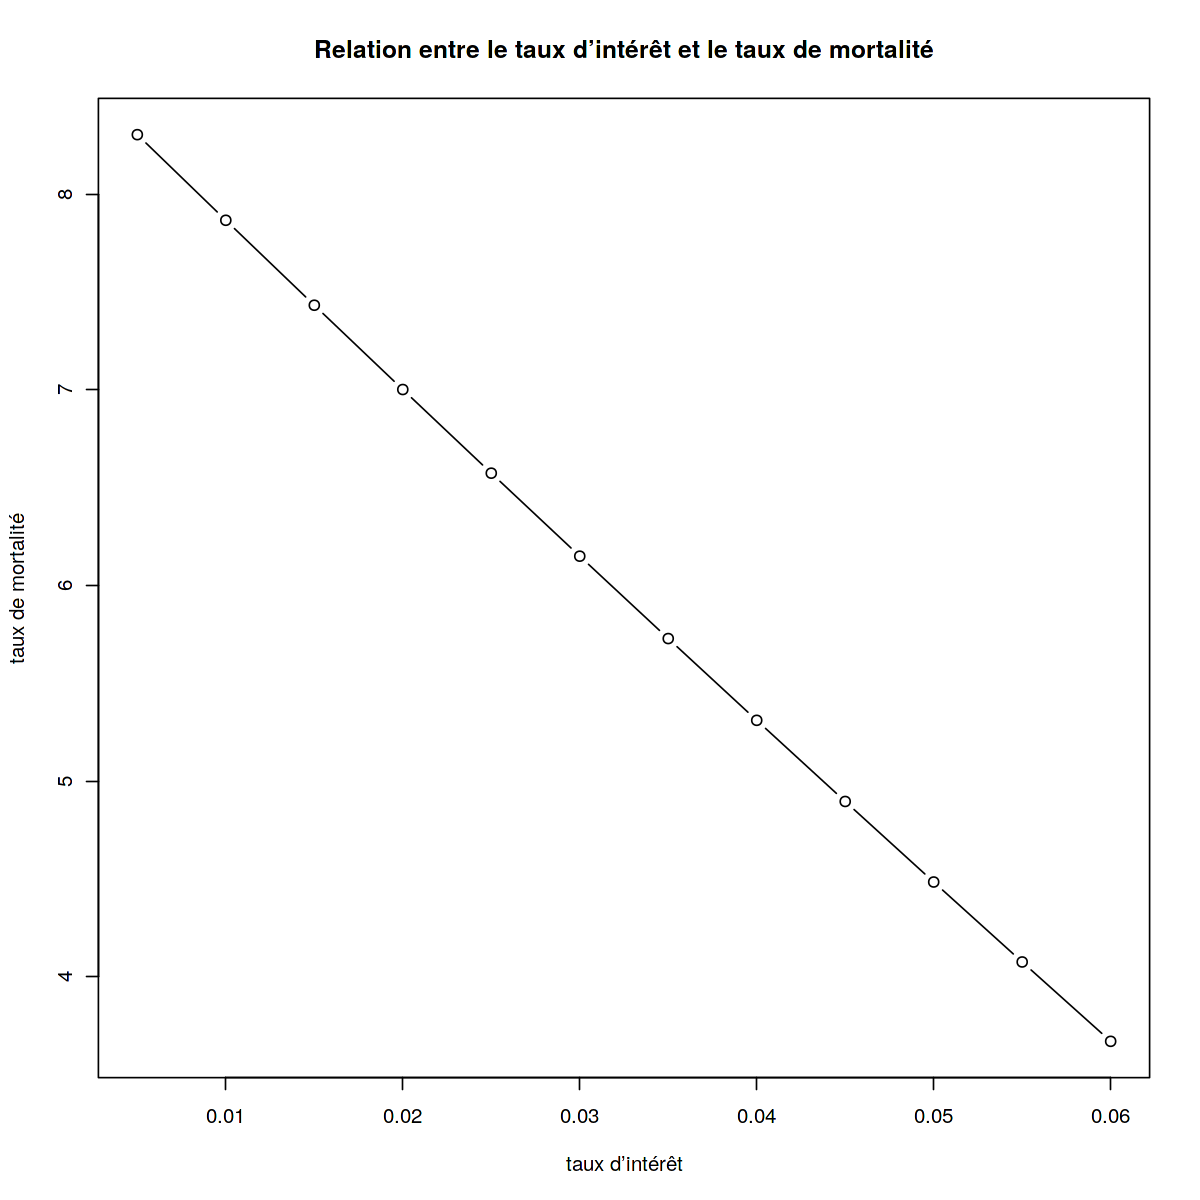

In [40]:
plot(seq(0.005,0.06,by=0.005),list ,type="b",xlab="taux d’intérêt",ylab="taux de mortalité", main = "Relation entre le taux d’intérêt et le taux de mortalité")